# Проектная работа: Принятие решений в бизнесе на основе данных

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки. 

*Цель работы* - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Работать будем с выгрузами hypothesis.csv, orders.csv, visitors.csv.
.
# Содержание работы:
1. [Часть 1. Приоритизация гипотез](#p1)
2. [Часть 2. Анализ A/B-теста](#p2)   
[1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения](#p21)  
[2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения](#p22)  
[3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения](#p23)  
[4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#p24)  
[5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#p25)  
[6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#p26)  
[7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#p27)  
[8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#p28)  
[9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#p29)  
[10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#p210)  
[11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#p211)  
[12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#p212)  
[13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#p213)  
[14. Примите решение по результатам теста и объясните его.](#p214)  
 
3. [Общий вывод](#p3)     



<b>Часть 1. Приоритизация гипотез <a name="p1"></a>

Подгрузим библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

Прочитаем файлы с данными о гипотезах.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


По каждому параметру видны свои лидеры.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2) 
pd.set_option("max_colwidth", 1000)
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно методу ICE, наиболее перспективные гипотезы с индексами 8,0 и 7.

Посчитаем также приоритезацию методом RICE.

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По RICE картина немного другая. В лидерах за явным преимуществом гипотеза 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Далее в топ ворвалась гипотеза с индексом 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

Третье место делят гипотезы 0 и 6.

Изменение приоретизации произошло за счет добавления в методику подсчета параметра Reach, который показывает охват пользователей.

In [5]:
hypothesis_checked = hypothesis[['Hypothesis','ICE','RICE']]

In [6]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [7]:
hypothesis_checked.style.apply(highlight_max,subset=['ICE', 'RICE'])

,Hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2


<b> Часть 2. Анализ A/B-теста  <a name="p2"></a>

Подготовим данные.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пустых значений нет. Приведем даты к типу дата.

In [12]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y.%m.%d %H:%M:%S')
orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d %H:%M:%S')

In [13]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [14]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [15]:
visitors.duplicated().mean()

0.0

In [16]:
orders.duplicated().mean()

0.0

Дублей нет, данне готовы к работе.

**1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.** <a name="p21"></a>

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.
Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков и отсортируем результаты по столбцам 'date' и 'group':

In [18]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [19]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим таблицы, пропишем названия столбцов.

In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики.

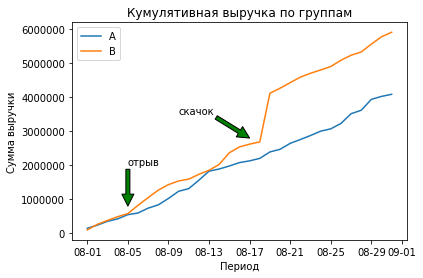

In [21]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#формат даты для подписей
timeFmt = mdates.DateFormatter('%m-%d')

fig, ax = plt.subplots()

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

ax.xaxis.set_major_formatter(timeFmt)

plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Период')
plt.ylabel('Сумма выручки')

plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 

plt.show();

Ближе к середине периода сегмент B вырвался вперед и не терял позиции. Похоже в выборках есть аномальные покупки, т.к. визуально виден резкий скачок выручки.

**2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.** <a name="p22"></a>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

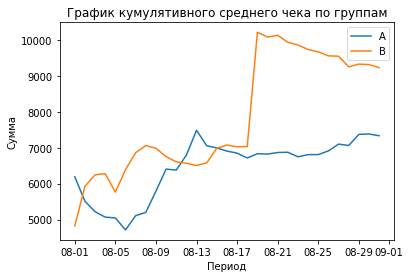

In [22]:
#формат даты для подписей
timeFmt = mdates.DateFormatter('%m-%d')
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(timeFmt)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Период')
plt.ylabel('Сумма')
plt.legend();

Кумулятивное значение среднего чека очень колеблится. В целом, у группы B он значительно выше. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

**3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.** <a name="p23"></a>

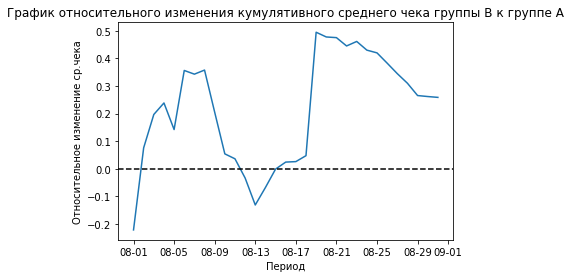

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#формат даты для подписей
timeFmt = mdates.DateFormatter('%m-%d')
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(timeFmt)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--'); 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Период');
plt.ylabel('Относительное изменение ср.чека');

В нескольких точках график различия между сегментами резко «скачет». Здесь и спрятались крупные заказы. Но в целом група B стабильно приносила больший доход.

**4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.** <a name="p24"></a>

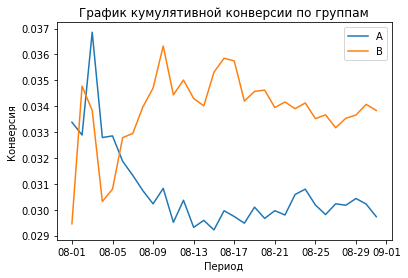

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#формат даты для подписей
timeFmt = mdates.DateFormatter('%m-%d')
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(timeFmt)

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Период');
plt.ylabel('Конверсия');
plt.legend();

В начале периода конверсия группы А была выше, затем резко снизилась. У группы В наоборот, на исходе первой декады произошел резкий скачок в конверсии. Во второй половине месяца конверсия групп колебалась в установившихся диапазонах и была достаточно симметрична. Но группа В и здесь показала себя лучше.

**5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.** <a name="p25"></a>

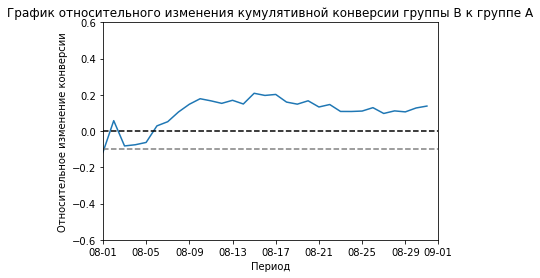

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#формат даты для подписей
timeFmt = mdates.DateFormatter('%m-%d')
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(timeFmt)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Период');
plt.ylabel('Относительное изменение конверсии');
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6]) ;

Еще один график подтверждающий лидерство группы В. Лишь в начале теста она проседала, далее стабильно чувствовала себя лучше. Хоть в конце и есть некоторая тенденция к снижению, но конверсия в целом установилась.

**6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.** <a name="p26"></a>

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [26]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorid','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, заказавшие больше 5 раз в день.

Построим гистрограмму распределения количества заказов на одного пользователя

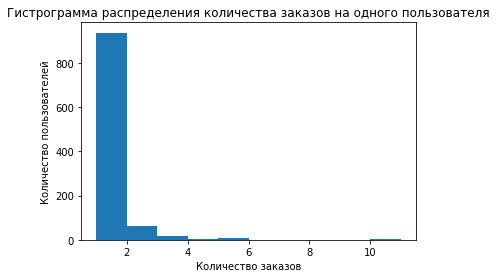

In [27]:
plt.hist(ordersByUsers['orders']);
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов');
plt.ylabel('Количество пользователей');

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже ощутима.
Построим точечную диаграмму числа заказов на одного пользователя.

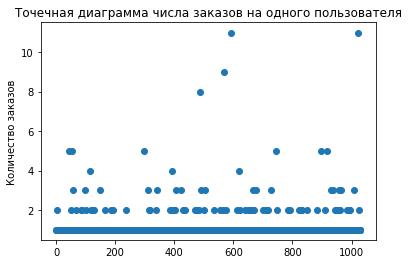

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']); 
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов');

Доля пользователей совершивших 2-3 заказа ощутима. Даже 5 заказов случаются не разово. Число заказов больше 5 уже точно можно считать аномальным. Но дополнительно просчитаем перцентели.

**7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.** <a name="p27"></a>

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

In [30]:
np.percentile(ordersByUsers['orders'], [95,96,97,98,99])

array([2., 2., 2., 3., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И лишь 1% пользователей заказывал более четырех раз.
Разумно выбрать 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. Потеряем около 2% заказов, это допустимо.

**8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.** <a name="p28"></a>

In [31]:
revenueByUsers = orders.drop(['group', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'revenue' : 'sum'})
revenueByUsers.columns = ['visitorid','revenue']
revenueByUsers.sort_values(by='revenue',ascending=False).head(10)

,visitorid,revenue
463,1920142716,1294500
503,2108080724,202740
1023,4256040402,176490
1026,4266935830,157980
569,2378935119,142939
316,1316129916,94770
314,1307669133,92550
213,888512513,86620
744,3062433592,75459
186,759473111,72000


In [32]:
revenueByUsers = orders.drop(['group', 'date'], axis=1).groupby('transactionId', as_index=False).agg({'revenue' : 'sum'})
revenueByUsers.columns = ['transactionId','revenue']
revenueByUsers.sort_values(by='revenue',ascending=False).head(10)

,transactionId,revenue
168,590470918,1294500
1107,3936777065,202740
49,192721366,93940
188,666610489,92550
1029,3668308183,86620
322,1216533772,78990
503,1811671147,78990
1000,3603576309,67990
364,1348774318,66350
81,316924019,65710


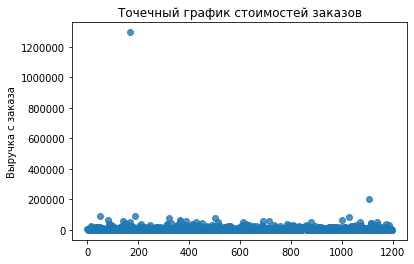

In [33]:
rev_values = pd.Series(range(0,len(revenueByUsers)))

plt.scatter(rev_values, revenueByUsers['revenue'], alpha = 0.8); 

plt.title('Точечный график стоимостей заказов')
plt.ylabel('Выручка с заказа');

Абсолютно ненаглядно. Есть явно выбивающиеся суммы. Заказ на 1,3 млн - это успех. 
Поставим ограничение по оси Y.

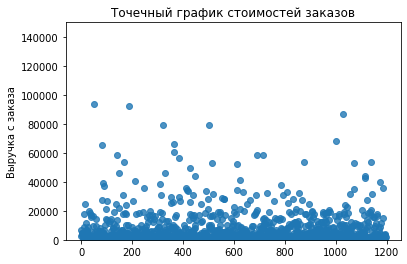

In [34]:
plt.scatter(rev_values, revenueByUsers['revenue'], alpha = 0.8); 
plt.ylim(0,150000)  
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Выручка с заказа');

Нагляднее. Видим, что Большинство заказов находятся в ределах 20000. Заказы свыше 40 тысяч уже довольно редки.

**9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов** <a name="p29"></a>

In [35]:
np.percentile(revenueByUsers['revenue'], [95,99])

array([28000. , 58233.2])

In [36]:
np.percentile(revenueByUsers['revenue'], [95,96,97,98,99])

array([28000. , 31382. , 35485. , 44133.2, 58233.2])

Не более 5% пользователей оформляли заказы дороже, чем на 28 тысяч. 1% пользователей заказывал на суммы дороже 58223. Выберем сумму заказа в 35 тысяч за верхнюю границу стоимости заказа, и отсеим аномальных пользователей по ней. Потеряем около 3% заказов.

**10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.** <a name="p210"></a>

Примем за нулевую гипотизу равенство конверсий и редних чекв между группами А и В.

Тогда обратной гипотезой будем считать предположение, что конверсия и средний чек отличаются между группами.

Найдем общее количество пользователей в каждой группе по дням.

In [37]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Найдем количество покупателей и их количество покупок группам.

In [38]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Соединим все в одну таблицу.

In [39]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.


In [40]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Переменная sampleA должна состоять из двух частей:
Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Создадим объект pd.Series нужной длины:

In [41]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Применим критерий Манна-Уитни.

In [42]:
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)) 

0.00840
0.138


Первое число - p-value = 0.00840 меньше 0.05, поэтому нулевую гипотезу отвергаем. 

Анализ сырых данных сообщает, что в конверсии между группами есть статистически значимые различия: относительный прирост конверсии группы В к конверсии группы А более 13%.

**11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.** <a name="p211"></a>

In [43]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.365
0.259


p-value > 0,05, статистически значимых отличий в среднем чеке между группами нет. 

Но средний чек группы В выше среднего чека группы А по сырым данным на 25%. Это значительно.

**12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.** <a name="p212"></a>

Ранее мы определили аномальных пользователей - они совершили от 3х заказов, аномальная сумма заказа была взята от 35 тысяч.
Найдем аномалии.


In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

Создадим сэмплы с очищенными от аномалий данными и применим статистический критерий Манна-Уитни к полученным выборкам.

In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

print("{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00502
0.179


Как и в случае с сырыми данными статистическая значимость достигнута. Разница конверсий на очищенных данных увеличилась до 17%.

**13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.** <a name="p213"></a>

In [46]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.442
0.022


Статистическая значимость по прежнему не появилась, но средний чек группы В по очизенным данным стал выще среднего чека группы А всего на 2%. Значит в данных стало меньше шума и аномальные заказы сильно влияли на средний чек.

**14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.** <a name="p214"></a>

Имеющиеся факты:
- В конверсии между группами есть статистически значимые различия: относительный прирост конверсии группы В к конверсии группы А более 13% по сырым данным и более 17% по очищенным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. По очищенным данным  средний чек группы В выше среднего чека группы А на 2%;
- График изменения кумулятивной конверсии группы B к группе A сообщает, что результаты группы B лучше группы A;
- График различия среднего чека сообщает, что результаты группы B лучше группы A значительно (но помним про выбросы).

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа B лучше группы А по всем параметрамю Можно перейти к проверке следующей гипотезы. Ура!


<b> Общий вывод <a name="p3"></a>

Таким образом, в ходе исследования, мы приоритизировали гипотезы методами ICE и RICE и проанализировали результаты А/В-теста.
Сделали вывод об успешности теста.



Список гипотиз, которые приоритетнее всего для проведения тестирования:
1. №7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. №0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. №8	Запустить акцию, дающую скидку на товар в день рождения
3. №2	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

По результатам А/В-теста отмечены следующие закономерности:
- График изменения кумулятивной конверсии группы B к группе A сообщает, что результаты группы B лучше группы A;
- График различия среднего чека сообщает, что результаты группы B лучше группы A значительно (но помним про выбросы);
- Аномальными признаны 2% заказов по количеству и 3% заказов по стоимости;
- В конверсии между группами есть статистически значимые различия: относительный прирост конверсии группы В к конверсии группы А более 13% по сырым данным и более 17% по очищенным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- По очищенным данным средний чек группы В выше среднего чека группы А на 2%;

Исходя из этого, группа В по всем параметрам лучше группы А, тест можно признать успешным и перейти к проверке следующей гипотезы.
